<a href="https://colab.research.google.com/github/vedikatupe/vedikatupe.github.io/blob/main/weather_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better plots
sns.set(style="whitegrid")


In [ ]:
from google.colab import files

# Upload your weatherHistory.csv file
uploaded = files.upload()
# Read the CSV file
data = pd.read_csv("weatherHistory.csv")

# Show the first few rows
data.head()


Saving weatherHistory.csv to weatherHistory (1).csv


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill numeric missing values with the mean
data = data.fillna(data.mean(numeric_only=True))

# Fill categorical missing values (like 'Precip Type') with the most common one
data['Precip Type'].fillna(data['Precip Type'].mode()[0], inplace=True)


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


<ipython-input-3-8e3b8a200f70>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Precip Type'].fillna(data['Precip Type'].mode()[0], inplace=True)


In [ ]:
# Convert 'Formatted Date' to datetime
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)


# Extract month
data['Month'] = data['Formatted Date'].dt.month



In [ ]:
# Group by month and calculate average temperature
avg_temp = data.groupby('Month')['Temperature (C)'].mean()
print("Average Temperature by Month:\n", avg_temp)


Average Temperature by Month:
 Month
1      0.815678
2      2.166880
3      6.914976
4     12.769200
5     16.874455
6     20.728510
7     22.965462
8     22.339134
9     17.503458
10    11.334119
11     6.587549
12     1.625086
Name: Temperature (C), dtype: float64


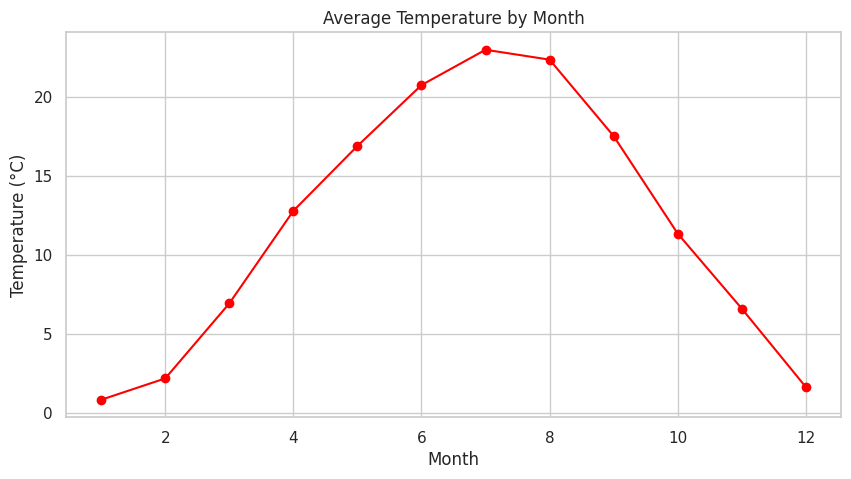

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(avg_temp.index, avg_temp.values, marker='o', color='red')
plt.title("Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


<ipython-input-13-e559f102607a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Precip Type', palette='coolwarm')


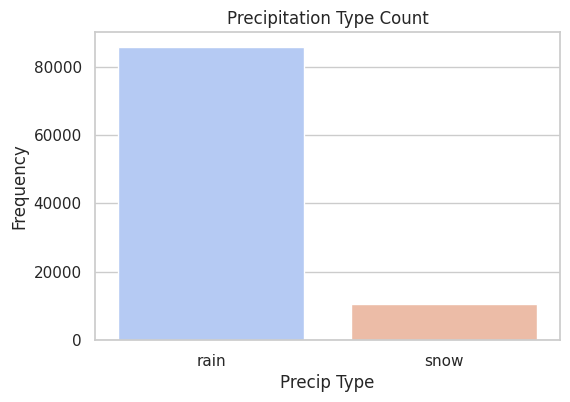

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Precip Type', palette='coolwarm')
plt.title("Precipitation Type Count")
plt.xlabel("Precip Type")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Find the hottest and coldest days
hottest = data[data['Temperature (C)'] == data['Temperature (C)'].max()]
coldest = data[data['Temperature (C)'] == data['Temperature (C)'].min()]

print("🔥 Hottest Day:\n", hottest)
print("\n❄️ Coldest Day:\n", coldest)


🔥 Hottest Day:
                  Formatted Date Summary Precip Type  Temperature (C)  \
12759 2007-07-22 13:00:00+00:00   Clear        rain        39.905556   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
12759                 37.538889      0.13            23.5865   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
12759                   250.0            9.982         0.0   

       Pressure (millibars)                             Daily Summary  Month  
12759               1007.55  Partly cloudy starting in the afternoon.      7  

❄️ Coldest Day:
                  Formatted Date Summary Precip Type  Temperature (C)  \
54847 2012-02-10 06:00:00+00:00   Foggy        snow       -21.822222   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
54847                -21.822222       0.8             3.0751   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
54847                   323.0           1.3685         0.0   

       Pre

In [ ]:
# Save cleaned data to a new CSV
data.to_csv("cleaned_weather_data.csv", index=False)

# Download it
files.download("cleaned_weather_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>